In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

Transformation of Claims Data: From Incremental to Cumulative Format:

In [23]:
df=pd.read_csv("Upper_Filled_Cumulative_Liquidity_Matrix_Risque simple.csv")
df = df.iloc[:, 0:]  # Supprime les deux premières colonnes
display(df)



,Year Survenance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,19,21,25
0,1998,2.350155e+03,6.540751e+03,1.003018e+04,1.657310e+04,2.073598e+04,2.551330e+04,3.069584e+04,6.881519e+04,9.340794e+04,1.091583e+05,1.154900e+05,9.827376e+04,1.355283e+06,2045859.12,2045859.12,2045859.12,2045859.12,2052859.12,2059859.12
1,2002,3.865214e+02,1.075733e+03,1.649627e+03,2.725718e+03,3.410371e+03,4.196079e+03,5.048433e+03,1.131778e+04,1.536246e+04,1.795286e+04,1.899422e+04,1.616273e+04,2.228985e+05,336475.00,336475.00,0.00,0.00,0.00,0.00
2,2004,2.019684e+04,5.621011e+04,8.619767e+04,1.424264e+05,1.782015e+05,2.192570e+05,2.637949e+05,5.913862e+05,8.027321e+05,9.380877e+05,9.925016e+05,8.631662e+04,1.190384e+06,1796935.80,1796935.80,1796935.80,0.00,0.00,0.00
3,2006,2.095019e+05,5.830678e+05,8.941289e+05,1.477390e+06,1.848485e+06,2.274354e+06,2.736346e+06,6.134453e+06,8.326745e+06,8.433022e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00
4,2007,1.194950e+03,3.325684e+03,5.099905e+03,8.426693e+03,1.054333e+04,1.297239e+04,1.560749e+04,3.498950e+04,1.179828e+05,1.960596e+05,2.035596e+05,2.164596e+05,5.753796e+06,8685605.66,0.00,0.00,0.00,0.00,0.00
5,2008,2.371911e+03,6.601300e+03,1.012303e+04,1.672652e+04,2.092793e+04,2.574948e+04,3.098000e+04,3.528599e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00
6,2009,6.295931e+04,1.752230e+05,2.687028e+05,4.439839e+05,5.555050e+05,6.834868e+05,1.616488e+06,1.662349e+06,1.670849e+06,1.753867e+06,3.815415e+06,4.744631e+06,4.746585e+06,0.00,0.00,0.00,0.00,0.00,0.00
7,2010,3.709614e+05,1.032428e+06,1.583219e+06,2.615990e+06,3.273081e+06,6.444981e+06,6.575501e+06,6.581141e+06,7.541373e+06,1.142067e+07,1.283142e+07,1.295757e+07,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00
8,2011,1.455698e+06,4.051375e+06,6.212745e+06,1.026547e+07,2.199142e+07,2.747490e+07,2.898752e+07,4.118617e+07,5.219117e+07,5.597666e+07,5.634922e+07,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00
9,2012,3.461674e+06,9.634235e+06,1.477401e+07,8.651846e+07,9.913063e+07,1.152832e+08,1.322592e+08,1.499969e+08,1.550551e+08,1.596512e+08,4.975742e+05,4.234002e+05,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00


Line Plot of Cumulative Claims Over Time:

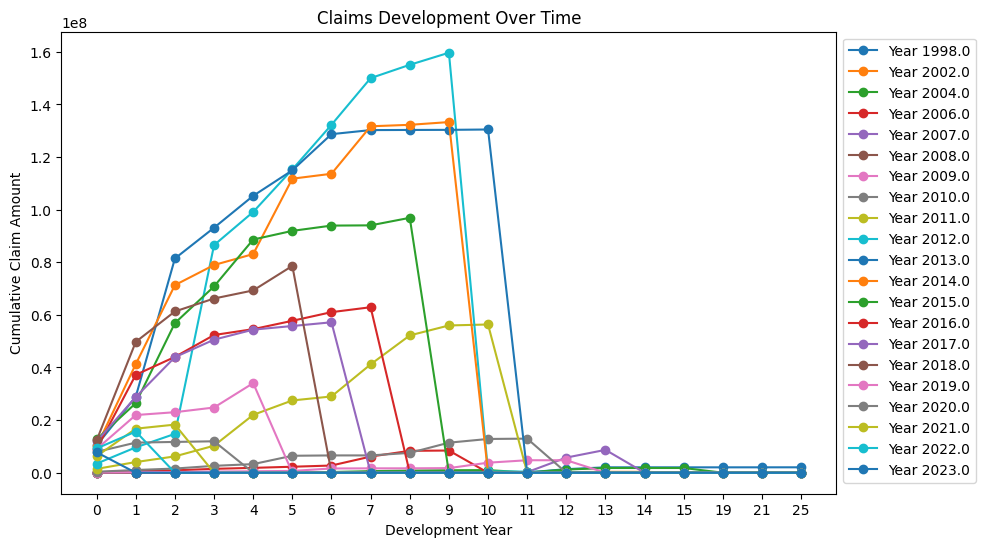

In [24]:
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(row.index[1:], row.values[1:], marker='o', label=f"Year {row['Year Survenance']}")

plt.xlabel("Development Year")
plt.ylabel("Cumulative Claim Amount")
plt.title("Claims Development Over Time")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Transformation of Cumulative Claims Data: Wide to Long Format

In [25]:
# Transformation of Cumulative Claims Data: Wide to Long Format
df_long= df.melt(id_vars=['Year Survenance'], var_name='Development Year', value_name='Claim Amount')

df_long['Development Year'] = df_long['Development Year'].astype(int)

display(df_long)


,Year Survenance,Development Year,Claim Amount
0,1998,0,2350.154942
1,2002,0,386.521426
2,2004,0,20196.836373
3,2006,0,209501.907348
4,2007,0,1194.950460
...,...,...,...
394,2019,25,0.000000
395,2020,25,0.000000
396,2021,25,0.000000
397,2022,25,0.000000


In [26]:
print((df_long['Claim Amount']==0).sum())

203


Distribution of Claim Amounts in the Longitudinal Data

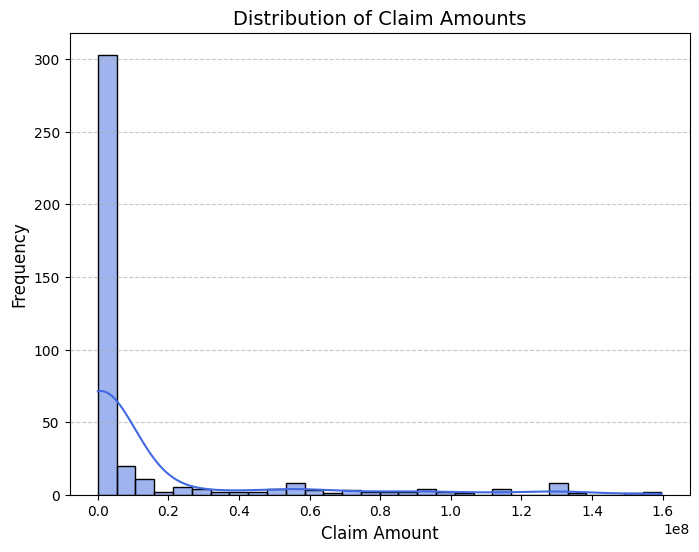

In [27]:
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(8, 6))
sns.histplot(df_long['Claim Amount'], bins=30, kde=True, color="royalblue")  
plt.title("Distribution of Claim Amounts", fontsize=14)  
plt.xlabel("Claim Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


Poisson Regression Model for Predicting Claim Amounts

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load and preprocess data
df_long['Year Survenance'] = pd.to_numeric(df_long['Year Survenance'], errors='coerce')
df_long['Development Year'] = pd.to_numeric(df_long['Development Year'], errors='coerce')
df_long['Claim Amount'] = pd.to_numeric(df_long['Claim Amount'], errors='coerce')

# Identify missing and zero values
df_long['Missing'] = df_long['Claim Amount'].isna() | (df_long['Claim Amount'] == 0)

# Separate known (nonzero) and unknown (zero/missing) data
df_known = df_long[~df_long['Missing']].copy()
df_missing = df_long[df_long['Missing']].copy()

# Log transformation to stabilize variance
df_known['Log_Claim_Amount'] = np.log1p(df_known['Claim Amount'])

# Independent variables (predictors)
X = df_known[['Year Survenance', 'Development Year']]
X_glm = sm.add_constant(X)  # Add constant for GLM

# Dependent variable (log-transformed claim amount)
y = df_known['Log_Claim_Amount']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_glm, y, test_size=0.2, random_state=42)

# Step 1: Train GLM Model (Poisson)
glm_model = sm.GLM(y_train, X_train, family=Poisson()).fit()

# Step 2: Predict using GLM
y_train_pred_glm_log = glm_model.predict(X_train)
y_test_pred_glm_log = glm_model.predict(X_test)

y_train_pred_glm = np.expm1(y_train_pred_glm_log)  # Convert back to original scale
y_test_pred_glm = np.expm1(y_test_pred_glm_log)

# Step 3: Compute Residuals (GLM Prediction Error)
residuals_train = y_train - y_train_pred_glm_log  # Train residuals (log-scale)
residuals_test = y_test - y_test_pred_glm_log  # Test residuals (log-scale)

# Step 4: Train Gradient Boosting Regressor on Residuals
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train.drop(columns=['const']), residuals_train)

# Step 5: Predict Residuals Using Gradient Boosting
residuals_pred_train = gb_model.predict(X_train.drop(columns=['const']))
residuals_pred_test = gb_model.predict(X_test.drop(columns=['const']))

# Step 6: Combine GLM Predictions + Corrected Residuals
y_train_pred_hybrid_log = y_train_pred_glm_log + residuals_pred_train
y_test_pred_hybrid_log = y_test_pred_glm_log + residuals_pred_test

y_train_pred_hybrid = np.expm1(y_train_pred_hybrid_log)  # Convert back to original scale
y_test_pred_hybrid = np.expm1(y_test_pred_hybrid_log)

# Step 7: Compute Train & Test Errors
mse_train_glm = mean_squared_error(np.expm1(y_train), y_train_pred_glm)
mse_test_glm = mean_squared_error(np.expm1(y_test), y_test_pred_glm)

mse_train_hybrid = mean_squared_error(np.expm1(y_train), y_train_pred_hybrid)
mse_test_hybrid = mean_squared_error(np.expm1(y_test), y_test_pred_hybrid)

# Step 8: Predict Missing (Zero) Values Using GLM + GBR (Only if df_missing is not empty)
if not df_missing.empty:
    X_missing = sm.add_constant(df_missing[['Year Survenance', 'Development Year']])
    y_missing_glm_log = glm_model.predict(X_missing)
    y_missing_residuals = gb_model.predict(df_missing[['Year Survenance', 'Development Year']])
    y_missing_hybrid_log = y_missing_glm_log + y_missing_residuals

    df_long.loc[df_long['Missing'], 'Claim Amount'] = np.maximum(np.expm1(y_missing_hybrid_log), 0)  # Ensure non-negative values

# Step 9: Display Results
print(f" Train MSE (GLM Only, Nonzero Data): {mse_train_glm:.4f}")
print(f" Test MSE (GLM Only, Nonzero Data): {mse_test_glm:.4f}")

print(f" Train MSE (GLM + Gradient Boosting, Nonzero Data): {mse_train_hybrid:.4f}")
print(f" Test MSE (GLM + Gradient Boosting, Nonzero Data): {mse_test_hybrid:.4f}")

# Step 10: Save the updated dataset
df_long.drop(columns=['Missing'], inplace=True)
df_long.to_csv("Filled_Liquidity_Matrix.csv", index=False)
print("\n Zero values predicted and saved to 'Filled_Liquidity_Matrix.csv'")


 Train MSE (GLM Only, Nonzero Data): 5873647475784191.0000
 Test MSE (GLM Only, Nonzero Data): 2995081788459570.0000
 Train MSE (GLM + Gradient Boosting, Nonzero Data): 497690990799461.5625
 Test MSE (GLM + Gradient Boosting, Nonzero Data): 1924702058638080.5000

 Zero values predicted and saved to 'Filled_Liquidity_Matrix.csv'


In [34]:
df_long
df_long.to_csv("df_long.csv")

In [ ]:
all_dev_years = list(range(26)) 

df_matrix = df_long.pivot(index='Year Survenance', columns='Development Year', values='Claim Amount')

df_matrix = df_matrix.reindex(columns=all_dev_years, fill_value=0)

df_matrix.reset_index(inplace=True)

df_matrix = df_matrix.sort_values(by='Year Survenance')
df_matrix = df_matrix[['Year Survenance'] + sorted(df_matrix.columns[1:])]

df_matrix.columns.name = None  

display(df_matrix)


,Year Survenance,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,1998,2.350155e+03,6.540751e+03,1.003018e+04,1.657310e+04,2.073598e+04,2.551330e+04,3.069584e+04,6.881519e+04,9.340794e+04,...,0,0,0,2.045859e+06,0,2.052859e+06,0,0,0,2.059859e+06
1,2002,3.865214e+02,1.075733e+03,1.649627e+03,2.725718e+03,3.410371e+03,4.196079e+03,5.048433e+03,1.131778e+04,1.536246e+04,...,0,0,0,2.232197e+06,0,5.361871e+06,0,0,0,3.773267e+07
2,2004,2.019684e+04,5.621011e+04,8.619767e+04,1.424264e+05,1.782015e+05,2.192570e+05,2.637949e+05,5.913862e+05,8.027321e+05,...,0,0,0,1.417042e+07,0,3.740082e+07,0,0,0,3.083350e+08
3,2006,2.095019e+05,5.830678e+05,8.941289e+05,1.477390e+06,1.848485e+06,2.274354e+06,2.736346e+06,6.134453e+06,8.326745e+06,...,0,0,0,2.730773e+08,0,7.745270e+08,0,0,0,7.466326e+09
4,2007,1.194950e+03,3.325684e+03,5.099905e+03,8.426693e+03,1.054333e+04,1.297239e+04,1.560749e+04,3.498950e+04,1.179828e+05,...,0,0,0,3.455346e+07,0,1.017952e+08,0,0,0,1.065684e+09
5,2008,2.371911e+03,6.601300e+03,1.012303e+04,1.672652e+04,2.092793e+04,2.574948e+04,3.098000e+04,3.528599e+05,1.810198e+05,...,0,0,0,6.909380e+07,0,2.117191e+08,0,0,0,2.414326e+09
6,2009,6.295931e+04,1.752230e+05,2.687028e+05,4.439839e+05,5.555050e+05,6.834868e+05,1.616488e+06,1.662349e+06,1.670849e+06,...,0,0,0,1.411847e+08,0,4.506255e+08,0,0,0,5.614859e+09
7,2010,3.709614e+05,1.032428e+06,1.583219e+06,2.615990e+06,3.273081e+06,6.444981e+06,6.575501e+06,6.581141e+06,7.541373e+06,...,0,0,0,2.718446e+08,0,9.051085e+08,0,0,0,1.236267e+10
8,2011,1.455698e+06,4.051375e+06,6.212745e+06,1.026547e+07,2.199142e+07,2.747490e+07,2.898752e+07,4.118617e+07,5.219117e+07,...,0,0,0,1.057250e+08,0,3.677713e+08,0,0,0,5.524974e+09
9,2012,3.461674e+06,9.634235e+06,1.477401e+07,8.651846e+07,9.913063e+07,1.152832e+08,1.322592e+08,1.499969e+08,1.550551e+08,...,0,0,0,7.815542e+07,0,2.844931e+08,0,0,0,4.717046e+09


In [32]:
df_matrix.to_csv("df_matrix")

## Calculate Provision (Sub Branche)

In [36]:
# Ensure df_matrix is structured correctly
df_matrix = df_matrix.copy()

# Step 1: Extract the latest cumulative paid claims (last nonzero value in each row)
paid_claims = df_matrix.set_index("Year Survenance").apply(
    lambda row: row[row != 0].iloc[-1] if any(row != 0) else 0, axis=1
)

# Step 2: Extract the ultimate predicted claims for each year (last value in each row)
predicted_ultimate_claims = df_matrix.set_index("Year Survenance").iloc[:, -1]  # Last column per row

# Step 3: Compute provisions (difference between ultimate claims and paid claims)
provisions = paid_claims.sum()

# Display Results
print("\nPaid Claims (Cumulative):")
print(paid_claims)

print("\nThe Provision:")
print(provisions)


Paid Claims (Cumulative):
Year Survenance
1998    2.059859e+06
2002    3.773267e+07
2004    3.083350e+08
2006    7.466326e+09
2007    1.065684e+09
2008    2.414326e+09
2009    5.614859e+09
2010    1.236267e+10
2011    5.524974e+09
2012    4.717046e+09
2013    4.200311e+10
2014    4.678970e+10
2015    1.150348e+11
2016    2.946142e+11
2017    6.806242e+11
2018    2.377144e+12
2019    7.066672e+12
2020    1.055707e+13
2021    3.597469e+13
2022    1.015399e+14
2023    2.821208e+14
dtype: float64

The Provision:
440854808163790.9


## Testing

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.genmod.families import Poisson

# Assuming df_long is your DataFrame
df_long['Year Survenance'] = pd.to_numeric(df_long['Year Survenance'], errors='coerce')
df_long['Development Year'] = pd.to_numeric(df_long['Development Year'], errors='coerce')
df_long['Claim Amount'] = pd.to_numeric(df_long['Claim Amount'], errors='coerce')

# Drop missing values (if any)
df_long = df_long.dropna()

# Ensure Claim Amount is strictly positive for Box-Cox transformation
df_long = df_long[df_long['Claim Amount'] > 0]  

# Apply Box-Cox Transformation
df_long['BoxCox_Claim_Amount'], lambda_opt = boxcox(df_long['Claim Amount'])  

# Independent variables (predictors)
X = df_long[['Year Survenance', 'Development Year']]
X = sm.add_constant(X)  # Add constant for intercept

# Dependent variable (transformed target)
y = df_long['BoxCox_Claim_Amount']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a GLM model using Poisson regression on Box-Cox transformed claims
model = sm.GLM(y_train, X_train, family=Poisson()).fit()

# Predict on the test set (Box-Cox scale)
y_pred_boxcox = model.predict(X_test)

# Convert predictions back to original scale using inverse Box-Cox
y_pred = (y_pred_boxcox * lambda_opt + 1) ** (1 / lambda_opt) if lambda_opt != 0 else np.exp(y_pred_boxcox)
y_test_original = (y_test * lambda_opt + 1) ** (1 / lambda_opt) if lambda_opt != 0 else np.exp(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error (Original Scale): {mse}")

# Print predictions
print("Predictions on test data:")
display(pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}))

# Mean Squared Error in transformed space
mse_scaled = mean_squared_error(y_test, y_pred_boxcox)
print(f"Mean Squared Error (Box-Cox Scale): {mse_scaled}")

# Print optimal lambda for reference
print(f"Optimal Box-Cox Lambda: {lambda_opt}")


Mean Squared Error (Original Scale): 2058623095884347.5
Predictions on test data:


,Actual,Predicted
160,6.290797e+07,1.084041e+08
128,2.637949e+05,2.308117e+05
16,8.986424e+06,3.705476e+07
78,6.622072e+07,6.781956e+07
191,9.380877e+05,6.140256e+05
274,3.364750e+05,9.316732e+05
72,8.651846e+07,3.393043e+06
56,4.393071e+07,2.806593e+07
18,6.274851e+06,1.036856e+08
218,5.634922e+07,2.552120e+07


Mean Squared Error (Box-Cox Scale): 66.55257021412729
Optimal Box-Cox Lambda: 0.10477668748070763


### Scatter Plot: Actual vs. Predicted

#### Residual Plot:

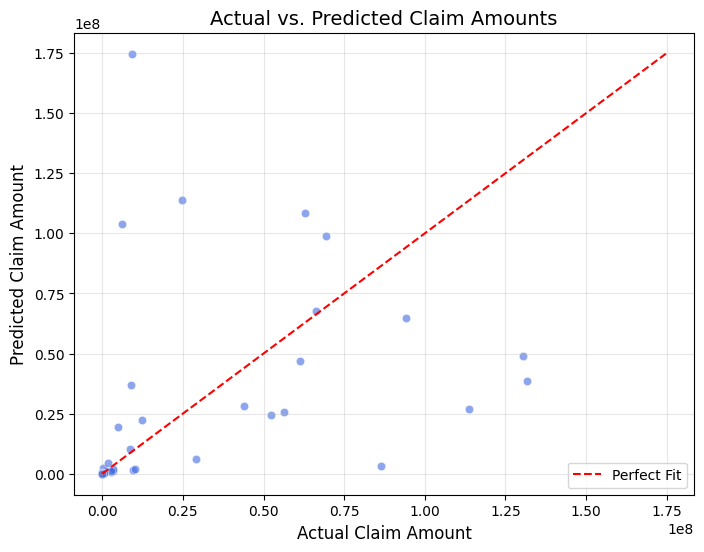

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred, color='royalblue', alpha=0.6)

# Plot y = x line (perfect predictions)
max_val = max(max(y_test_original), max(y_pred))
min_val = min(min(y_test_original), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Claim Amount", fontsize=12)
plt.ylabel("Predicted Claim Amount", fontsize=12)
plt.title("Actual vs. Predicted Claim Amounts", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Get GLM predictions for the full dataset (log scale)
df_long['GLM_Prediction_Log'] = model.predict(X)

# Convert GLM predictions back to original scale
df_long['GLM_Prediction'] = np.exp(df_long['GLM_Prediction_Log'])

# Compute Residuals (what GLM missed)
df_long['Residuals'] = df_long['Claim Amount'] - df_long['GLM_Prediction']
df_long

,Year Survenance,Development Year,Claim Amount,Log_Claim_Amount,BoxCox_Claim_Amount,GLM_Prediction_Log,GLM_Prediction,Residuals
0,1998,0,2.350155e+03,7.762237,11.981115,13.070055,4.745182e+05,-4.721680e+05
1,2002,0,3.865214e+02,5.957187,8.271917,16.857682,2.095068e+07,-2.095029e+07
2,2004,0,2.019684e+04,9.913281,17.422646,19.145119,2.063571e+08,-2.063369e+08
3,2006,0,2.095019e+05,12.252488,24.912442,21.742940,2.772292e+09,-2.772082e+09
4,2007,0,1.194950e+03,7.085860,10.508454,23.171192,1.156434e+10,-1.156434e+10
...,...,...,...,...,...,...,...,...
315,1998,15,2.045859e+06,14.531328,34.204878,26.144793,2.262243e+11,-2.262222e+11
317,2004,15,1.796936e+06,14.401593,33.614213,38.297096,4.287630e+16,-4.287630e+16
336,1998,19,2.045859e+06,14.531328,34.204878,31.454342,4.575592e+13,-4.575592e+13
357,1998,21,2.052859e+06,14.534744,34.220538,34.500732,9.626705e+14,-9.626705e+14


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare ML inputs (same as GLM)
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    df_long[['Year Survenance', 'Development Year']],  # Predictors
    df_long['Residuals'],  # Target (Residuals)
    test_size=0.2,
    random_state=42
)

# Train Random Forest on Residuals
ml_model = RandomForestRegressor(n_estimators=100, random_state=42)
ml_model.fit(X_train_ml, y_train_ml)

# Predict Residuals using ML
df_long['ML_Residuals_Prediction'] = ml_model.predict(df_long[['Year Survenance', 'Development Year']])


In [ ]:
df_long['Hybrid_Prediction'] = df_long['GLM_Prediction'] + df_long['ML_Residuals_Prediction']


In [ ]:
mse_glm = mean_squared_error(df_long['Claim Amount'], df_long['GLM_Prediction'])
mse_ml = mean_squared_error(df_long['Claim Amount'], df_long['ML_Residuals_Prediction'])
mse_hybrid = mean_squared_error(df_long['Claim Amount'], df_long['Hybrid_Prediction'])

print(f"GLM MSE: {mse_glm}")
print(f"ML MSE (Residuals): {mse_ml}")
print(f"Hybrid Model MSE: {mse_hybrid}")


GLM MSE: 2.865033497382679e+53
ML MSE (Residuals): 1.4778641642782026e+53
Hybrid Model MSE: 4.840504294171024e+52


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from scipy.special import inv_boxcox

# Load dataset (Assuming df_long is preloaded)
df_long['Year Survenance'] = pd.to_numeric(df_long['Year Survenance'], errors='coerce')
df_long['Development Year'] = pd.to_numeric(df_long['Development Year'], errors='coerce')
df_long['Claim Amount'] = pd.to_numeric(df_long['Claim Amount'], errors='coerce')

# Drop missing values
df_long = df_long.dropna()

# Remove non-positive values for transformations that require positives
df_long = df_long[df_long['Claim Amount'] > 0]

# Dictionary of transformations
transformations = {}

# No transformation
transformations['none'] = (lambda x: x, lambda x: x)

# Log transformation
transformations['log'] = (lambda x: np.log1p(x), lambda x: np.expm1(x))

# Square root transformation
transformations['sqrt'] = (lambda x: np.sqrt(x), lambda x: x**2)

# Box-Cox transformation (only if values are strictly positive)
if (df_long['Claim Amount'] > 0).all():
    boxcox_data, lambda_boxcox = stats.boxcox(df_long['Claim Amount'])
    transformations['box-cox'] = (lambda x: stats.boxcox(x)[0], lambda x: inv_boxcox(x, lambda_boxcox))

# Yeo-Johnson transformation (handles zero and negative values)
pt = PowerTransformer(method='yeo-johnson')
pt.fit(df_long[['Claim Amount']])  # Fit transformer on data
transformations['yeo-johnson'] = (
    lambda x: pt.transform(x.values.reshape(-1, 1)).flatten(),
    lambda x: pt.inverse_transform(x.reshape(-1, 1)).flatten()
)

# Best model tracking
best_mse = float('inf')
best_transform_name = None
best_model = None
best_inv_transform = None

# Independent variables (predictors)
X = df_long[['Year Survenance', 'Development Year']]
X = sm.add_constant(X)  # Add intercept

# Iterate through transformations
for name, (transform, inv_transform) in transformations.items():
    try:
        print(f"🔍 Testing transformation: {name}")

        # Apply transformation
        y_transformed = transform(df_long['Claim Amount'])

        # Ensure no NaN or infinite values
        if np.isnan(y_transformed).any() or np.isinf(y_transformed).any():
            print(f"❌ Skipping {name} due to NaN or Inf values.")
            continue

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

        # Fit GLM Poisson model
        model = sm.GLM(y_train, X_train, family=Poisson()).fit()

        # Predict on test set
        y_pred_transformed = model.predict(X_test)

        # Convert predictions back to original scale
        y_pred = inv_transform(y_pred_transformed)
        y_test_original = inv_transform(y_test)

        # Compute MSE
        mse = mean_squared_error(y_test_original, y_pred)
        print(f"  ✅ {name} MSE: {mse}")

        # Track best model
        if mse < best_mse:
            best_mse = mse
            best_transform_name = name
            best_model = model
            best_inv_transform = inv_transform

    except Exception as e:
        print(f"⚠️ Error with {name}: {e}")

# Display best transformation
print(f"\n✅ Best Transformation: {best_transform_name} with MSE: {best_mse}")

# Final predictions using best model
y_test_pred_final = best_inv_transform(best_model.predict(X_test))
final_mse = mean_squared_error(y_test_original, y_test_pred_final)
print(f"🎯 Final Model MSE: {final_mse}")

# Display predictions
print("📊 Best Model Predictions on Test Data:")
display(pd.DataFrame({'Actual': y_test_original, 'Predicted': y_test_pred_final}))


🔍 Testing transformation: none
  ✅ none MSE: 1028682365294590.6
🔍 Testing transformation: log
  ✅ log MSE: 2995081788459570.0
🔍 Testing transformation: sqrt
  ✅ sqrt MSE: 1340062260727256.5
🔍 Testing transformation: box-cox
  ✅ box-cox MSE: 2058623095884351.2
🔍 Testing transformation: yeo-johnson
⚠️ Error with yeo-johnson: NaN, inf or invalid value detected in weights, estimation infeasible.

✅ Best Transformation: none with MSE: 1028682365294590.6
🎯 Final Model MSE: 1028682365294590.8
📊 Best Model Predictions on Test Data:


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlse

,Actual,Predicted
160,6.290797e+07,8.205099e+07
128,2.637949e+05,5.799504e+06
16,8.986424e+06,4.787720e+07
78,6.622072e+07,6.398521e+07
191,9.380877e+05,9.533164e+06
274,3.364750e+05,1.222479e+07
72,8.651846e+07,1.848023e+07
56,4.393071e+07,4.407938e+07
18,6.274851e+06,7.243016e+07
218,5.634922e+07,4.791299e+07


✅ Ridge Regression MSE: 3.5623889303789747e+53
✅ Lasso Regression MSE: 3.562418079388991e+53


c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e+55, tolerance: 5.522e+51
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.569e+55, tolerance: 5.523e+51
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.387e+55, tolerance: 5.008e+51
  model = cd_fast.enet_

✅ Random Forest MSE: 2.034089994706025e+53
✅ Gradient Boosting MSE: 1.6763217077166188e+53
⚠️ XGBoost failed: 'super' object has no attribute '__sklearn_tags__'
✅ SVR (RBF Kernel) MSE: 3.621687358579223e+53
✅ Neural Network MSE: 3.6216873585857284e+53

🏆 Best ML Model: Gradient Boosting with MSE = 1.6763217077166188e+53

🔹 GLM MSE: 2.865033497382679e+53
🔹 Best ML Model MSE: 2.862464292405499e+53 (Gradient Boosting)
🔹 Hybrid Model MSE: 4.5106859004402025e+49


C:\Users\Anfal\AppData\Local\Temp\ipykernel_3180\2371010595.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette="viridis")
c:\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a lengt

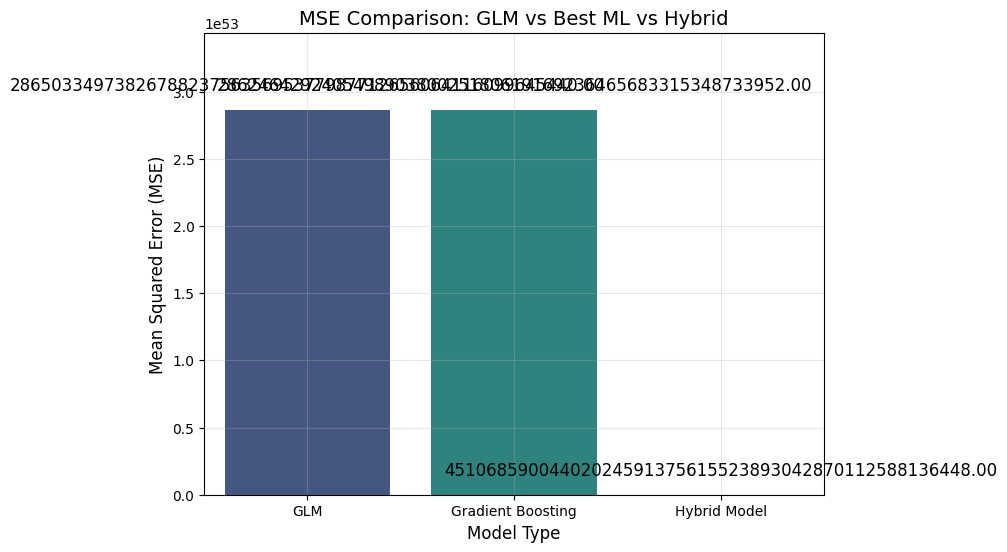

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Ensure 'df_long' is defined before using
if 'df_long' not in locals():
    raise ValueError("❌ DataFrame 'df_long' is not defined!")

# Step 1: Prepare the Data
X_ml = df_long[['Year Survenance', 'Development Year']]
y_ml = df_long['Residuals']

# Split into training and testing sets
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

# Step 2: Define ML Models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, enable_categorical=False),  # ✅ Fix applied
    "SVR (RBF Kernel)": SVR(kernel="rbf"),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

# Step 3: Train & Evaluate Each Model
results = {}
for name, model in models.items():
    try:
        scores = cross_val_score(model, X_train_ml, y_train_ml, scoring="neg_mean_squared_error", cv=5)
        mse = -np.mean(scores)  # Convert negative MSE to positive
        results[name] = mse
        print(f"✅ {name} MSE: {mse}")
    except Exception as e:
        print(f"⚠️ {name} failed: {e}")

# Step 4: Select the Best Model
best_model_name = min(results, key=results.get)
print(f"\n🏆 Best ML Model: {best_model_name} with MSE = {results[best_model_name]}")

# Train the best model on full data
best_model = models[best_model_name]
df_long['ML_Residuals_Prediction'] = best_model.fit(X_ml, y_ml).predict(X_ml)

# Step 5: Build the Hybrid Model
df_long['Hybrid_Prediction'] = df_long['GLM_Prediction'] + df_long['ML_Residuals_Prediction']

# Step 6: Compute Final MSEs
mse_glm = mean_squared_error(df_long['Claim Amount'], df_long['GLM_Prediction'])
mse_ml = mean_squared_error(df_long['Claim Amount'], df_long['ML_Residuals_Prediction'])
mse_hybrid = mean_squared_error(df_long['Claim Amount'], df_long['Hybrid_Prediction'])

print(f"\n🔹 GLM MSE: {mse_glm}")
print(f"🔹 Best ML Model MSE: {mse_ml} ({best_model_name})")
print(f"🔹 Hybrid Model MSE: {mse_hybrid}")

# Step 7: Visualization (MSE Comparison)
mse_values = [mse_glm, mse_ml, mse_hybrid]
model_names = ["GLM", best_model_name, "Hybrid Model"]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_values, palette="viridis")

for i, mse in enumerate(mse_values):
    plt.text(i, mse + (0.05 * max(mse_values)), f"{mse:.2f}", ha='center', fontsize=12)

plt.xlabel("Model Type", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("MSE Comparison: GLM vs Best ML vs Hybrid", fontsize=14)
plt.ylim(0, max(mse_values) * 1.2)
plt.grid(alpha=0.3)

plt.show()
